<a href="https://colab.research.google.com/github/annvorosh/GB/blob/PyTorch/PyTorch08_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Домашнее задание по результатам 8 вебинара.
1. Как было сказано ранее, GAN обучается воспроизводить реальные данные. Поэтому Вам предлагается обучить генератор создавать точки, которые будут лежать на графике функции
𝑦 = 𝑠𝑖𝑛(𝑥)/x − 𝑥 / 10
При выполнении данного задания структура GAN остается той же, но Вам нужно:
● Сгенерировать настоящие данные
● Изменить архитектуру дискриминатора и генератора
● Без графиков домашку не принимаю
2. (*Усложненное задание) Используя датасет MNIST из урока, построить модели генератора и дискриминатора в модели DCGAN как описано в оригинальной статье. И обучите ее на данных MNIST. В качестве помощи, можете воспользоваться официальной статьей от pytorch.

In [126]:
import torch
from torch import nn

import math
import matplotlib.pyplot as plt

In [127]:
torch.manual_seed(111)

Здесь мы составляем набор данных для обучения, состоящий из 1024 пар (x1, x2). Затем инициализируем нулями train_data – матрицу из 1024 строк и 2 столбцов.

Первый столбец train_data заполняем случайными значениями в интервале от 0 до 4π. Вычисляем значения второго столбца, как синус от первого.

In [128]:
train_data_length = 1024
train_data = torch.zeros((train_data_length, 2))

train_data[:, 0] = 4 * math.pi * torch.rand(train_data_length)
train_data[:, 1] = torch.sin(train_data[:, 0]) / train_data[:, 0] - train_data[:, 0] / 10

train_labels = torch.zeros(train_data_length)
train_set = [
    (train_data[i], train_labels[i]) for i in range(train_data_length)]

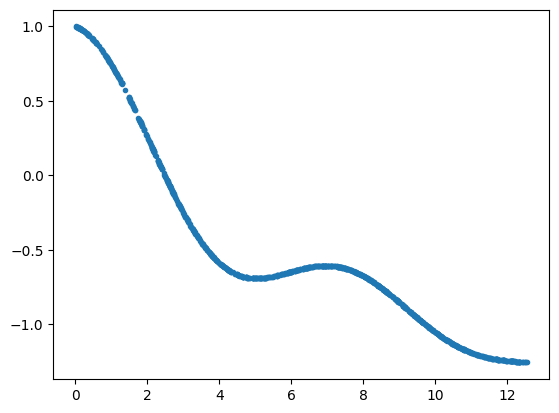

In [129]:
plt.plot(train_data[:, 0], train_data[:, 1], ".")

In [130]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True)

In [131]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1),
            nn.Sigmoid())

    def forward(self, x):
        output = self.model(x)
        return output

In [132]:
discriminator = Discriminator()

In [133]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, 2))

    def forward(self, x):
        output = self.model(x)
        return output

generator = Generator()

In [134]:
lr = 0.001
num_epochs = 210
loss_function = nn.BCELoss()

In [135]:
optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

Epoch: 0 Loss D.: 0.16255035996437073
Epoch: 0 Loss G.: 2.0497419834136963


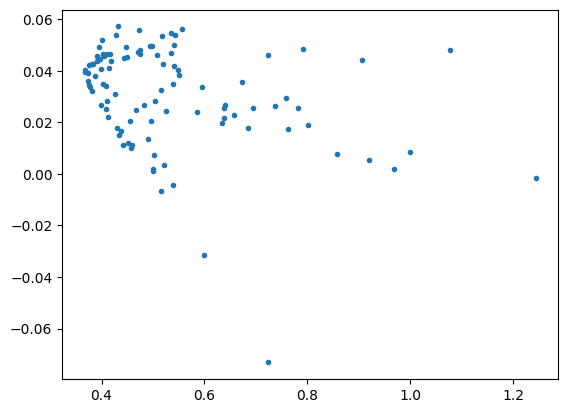

Epoch: 100 Loss D.: 0.6860641241073608
Epoch: 100 Loss G.: 0.6837371587753296


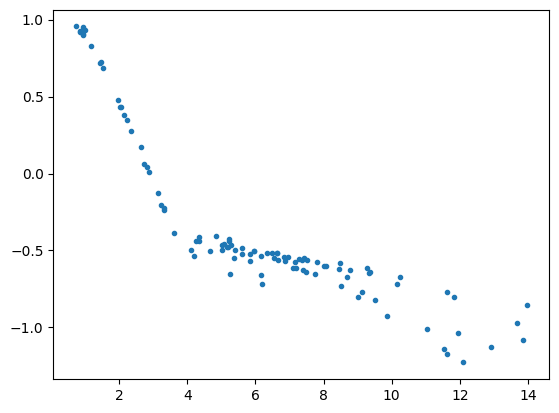

Epoch: 200 Loss D.: 0.6984249949455261
Epoch: 200 Loss G.: 0.7254676222801208


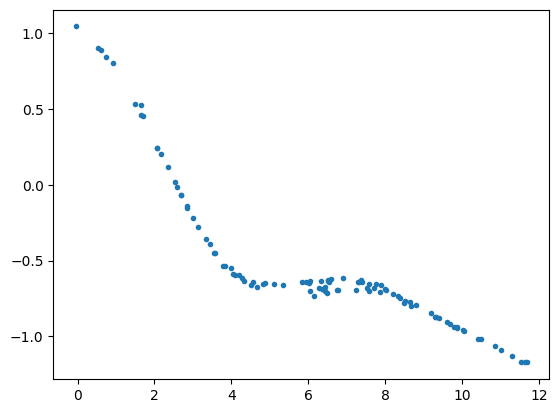

In [138]:
for epoch in range(num_epochs):
    for n, (real_samples, _) in enumerate(train_loader):
        # Данные для обучения дискриминатора
        real_samples_labels = torch.ones((batch_size, 1))
        latent_space_samples = torch.randn((batch_size, 2))
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1))
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat(
            (real_samples_labels, generated_samples_labels))

        # Обучение дискриминатора
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(
            output_discriminator, all_samples_labels)
        loss_discriminator.backward()
        optimizer_discriminator.step()

        # Данные для обучения генератора
        latent_space_samples = torch.randn((batch_size, 2))

        # Обучение генератора
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(
            output_discriminator_generated, real_samples_labels)
        loss_generator.backward()
        optimizer_generator.step()

        # Выводим значения функций потерь
        if epoch % 100 == 0 and n == batch_size - 1:
            print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
            print(f"Epoch: {epoch} Loss G.: {loss_generator}")
            latent_space_samples = torch.randn(100, 2)
            generated_samples = generator(latent_space_samples)
            generated_samples = generated_samples.detach()
            plt.plot(generated_samples[:, 0], generated_samples[:, 1], ".")

        plt.show()

Выше приведен процесс изменения графика в зависимости от количества эпох в обучении

In [139]:
latent_space_samples = torch.randn(200, 2)
generated_samples = generator(latent_space_samples)

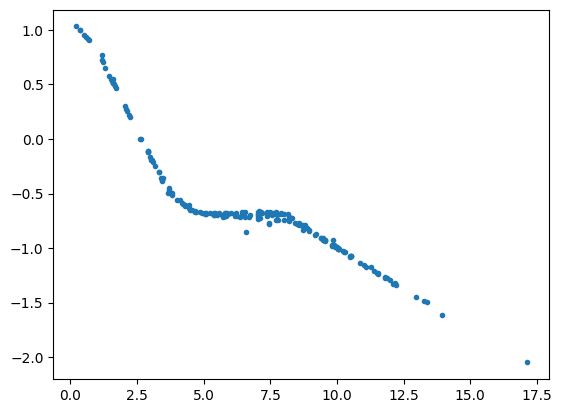

In [140]:
generated_samples = generated_samples.detach()
plt.plot(generated_samples[:, 0], generated_samples[:, 1], ".")